In [95]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Least squares and linear basis functions models
## Least squares

In [96]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least squares: TODO
    # returns mse, and optimal weights
    # ***************************************************
    w = np.linalg.solve(np.dot(tx.T,tx), np.dot(tx.T,y))
    e = y - np.dot(tx,w)
    n = e.shape[0]
    return (np.sqrt((1/n)*np.dot(e.T,e)), w)

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [97]:
from helpers import *
from grid_search import *
import datetime

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    

    grid_w0, grid_w1 = generate_w(num_intervals=100)
    grid_losses = grid_search(y, tx, grid_w0, grid_w1)
    loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
    loss_ls, w_ls = least_squares(y, tx)
    print("Grid Search: loss={lo}, w=({w0},{w1})".format(lo=np.sqrt(loss_star),w0=w0_star,w1=w1_star))
    print("Least Squares: loss={lo}, w=({w0},{w1})".format(lo=loss_ls,w0=w_ls[0],w1=w_ls[1]))

test_your_least_squares()

Grid Search: loss=5.578297835112345, w=(72.72727272727272,13.636363636363626)
Least Squares: loss=5.547231357863019, w=(73.29392200210505,13.479712434989228)


## Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [98]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [99]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # polynomial basis function: TODO
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data
    # ***************************************************
    transformed_data = []
    for xi in x:
        transformed_data.append(list(map(lambda d: xi**d, range(degree+1))))
    return np.array(transformed_data)

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737467
Processing 3th experiment, degree=7, rmse=0.2496587036090727
Processing 4th experiment, degree=12, rmse=0.24349809575326783


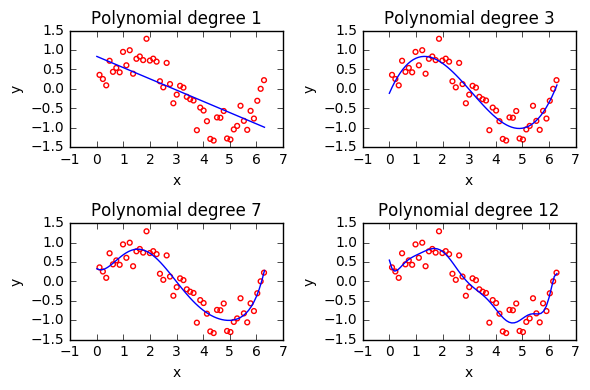

In [100]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        tx = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate rmse: TODO
        # ***************************************************
        rmse, weight = least_squares(y, tx)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weight, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()


polynomial_regression()

# Evaluating model predication performance

Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [101]:
def split_data(x, y, ratio, seed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(seed)
    n = y.shape[0]
    indices = np.random.permutation(n)
    train_lim = int(n*ratio)
    train_idx, test_idx = indices[:train_lim], indices[train_lim:]
    y_train, y_test = y[train_idx], y[test_idx]
    x_train, x_test = x[train_idx], x[test_idx]
    return (y_train, x_train, y_test, x_test)

Then, test your `split_data` function below.

In [110]:
import costs
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_train, x_train, y_test, x_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calcualte weight through least square.: TODO
    # ***************************************************
    rmse_tr, w = least_squares(y_train, x_train)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate RMSE for train and test data,
    # and store them in rmse_tr and rmse_te respectively: TODO
    # ***************************************************
    rmse_te = np.sqrt(costs.compute_loss(y_test, x_test, w))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))

seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.253
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.607
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.985
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=5.692


# Ridge Regression
Please fill in the function below.

In [121]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    n = y.shape[0]
    w = np.linalg.solve(np.dot(tx.T,tx)+ lamb*np.eye(tx.shape[1]), np.dot(tx.T,y))
    e = y - np.dot(tx,w)
    return (np.sqrt((1/n)*np.dot(e.T,e)), w)

In [122]:
import matplotlib.pyplot as plt

def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data, and return train and test data: TODO
    # ***************************************************
    y_train, x_train, y_test, x_test = split_data(x, y, ratio, seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form train and test data with polynomial basis function: TODO
    # ***************************************************
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression with different lambda: TODO
    # ***************************************************
    rmse_training = []
    rmse_test = []
    for lamb in lambdas:
        rmse_tr, w = ridge_regression(y_train, x_train, lamb)
        rmse_te = np.sqrt(costs.compute_loss(y_test, x_test, w))
        rmse_training.append(rmse_tr)
        rmse_test.append(rmse_te)
    plt.plot(lambdas, rmse_training, marker='x')
    plt.plot(lambdas, rmse_test, marker='x')
    plt.legend(['Train error','Test error'])
    plt.title('Ridge regression for polynomial degree {deg}'.format(deg=degree))
    plt.xlabel('label')
    plt.ylabel('RMSE')
    plt.xscale('log')
    plt.show()

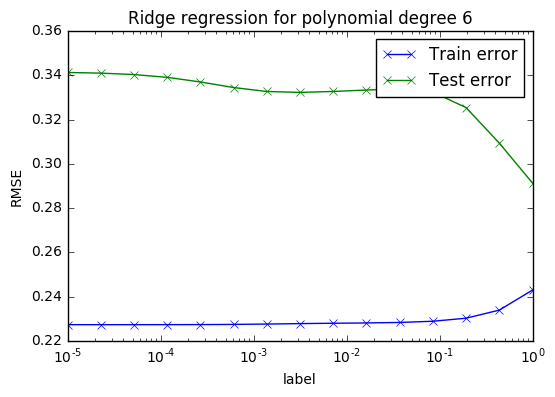

In [124]:
seed = 56
degree = 6
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)